In [1]:

# Setting Path

import os
os.chdir(r'C:\Users\asbpi\Desktop\Nit_DS & AI\MY Projects\project_sentiment analysis')

# Import Packages

import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

import spacy
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# nltk.download('stopwords')
# nltk.download('punkt')

nlp = spacy.load("en_core_web_sm")
punct = string.punctuation
stem = PorterStemmer()
lemma = WordNetLemmatizer()

from wordcloud import WordCloud
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

'''
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Flatten, Dense, LSTM
'''

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading Data

root = pd.read_csv(r'amazon_alexa.tsv' , delimiter = '\t' , quoting = 3)
data = root.copy()



In [3]:
# Ind and Dep variable


data = data.drop(['rating','date','variation'],axis = 1)
data.columns = ['reviews' , 'target']

x = data['reviews']
y = data['target']


In [4]:
print(x.head(10))

0                                        Love my Echo!
1                                            Loved it!
2    "Sometimes while playing a game, you can answe...
3    "I have had a lot of fun with this thing. My 4...
4                                                Music
5    "I received the echo as a gift. I needed anoth...
6    "Without having a cellphone, I cannot use many...
7    I think this is the 5th one I've purchased. I'...
8                                          looks great
9    "Love it! I’ve listened to songs I haven’t hea...
Name: reviews, dtype: object


In [5]:
# replace_text


def replace_text(rev):
    
    reviews = re.sub(r"what's", "what is ", rev)
    reviews = re.sub(r"\'s", " is", reviews)
    reviews = re.sub(r"\'ve", " have ", reviews)
    reviews = re.sub(r"can't", "cannot ", reviews)
    reviews = re.sub(r"n't", " not ", reviews)
    reviews = re.sub(r"i'm", "i am ", reviews)
    reviews = re.sub(r"\'re", " are ", reviews)
    reviews = re.sub(r"\'d", " would ", reviews)
    reviews = re.sub(r"\'ll", " will ", reviews)
    reviews = re.sub(r"\'scuse", " excuse ", reviews)
    reviews = re.sub('\W', ' ', reviews)
    reviews = re.sub('\s+', ' ', reviews)
    reviews = reviews.strip(' ')
    
    return reviews


In [6]:
for i in range(len(x)) :
    x[i] = replace_text(x[i])



In [7]:
print(x.head(10))

0                                         Love my Echo
1                                             Loved it
2    Sometimes while playing a game you can answer ...
3    I have had a lot of fun with this thing My 4 y...
4                                                Music
5    I received the echo as a gift I needed another...
6    Without having a cellphone I cannot use many o...
7    I think this is the 5th one I have purchased I...
8                                          looks great
9    Love it I ve listened to songs I haven t heard...
Name: reviews, dtype: object


In [8]:
# cleaned_text


def cleaned_text(rev):
      
    reviews = re.sub(r'\[[0-9]*\]', ' ',rev)
    reviews = re.sub(r'\s+', ' ', reviews)
    reviews = re.sub('[^a-zA-Z]', ' ', reviews )
    reviews = re.sub(r'\s+', ' ', reviews)
    reviews = re.sub(r'\W*\b\w{1,3}\b', "",reviews)
    reviews = reviews.strip()
    
  
    return reviews



In [9]:
for i in range(len(x)) :
    x[i] = cleaned_text(x[i])



In [10]:
print(x.head(10))

0                                            Love Echo
1                                                Loved
2    Sometimes while playing game answer question c...
3    have with this thing learns about dinosaurs co...
4                                                Music
5    received echo gift needed another Bluetooth so...
6    Without having cellphone cannot many features ...
7    think this have purchased working getting ever...
8                                          looks great
9    Love listened songs haven heard since childhoo...
Name: reviews, dtype: object


In [11]:
def remove_stopwords(rev):
    
    stop_words = set(stopwords.words('english'))
    
    tokens = word_tokenize(rev)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in stop_words]
    reviews = ' '.join(tokens)
    
    return reviews


In [12]:
for i in range(len(x)) :
    x[i] = remove_stopwords(x[i])
    
  

In [13]:
print(x.head(10))

0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    thing learns dinosaurs control lights play gam...
4                                                music
5    received echo gift needed another bluetooth so...
6    without cellphone many features ipad great ala...
7    think purchased working getting every room hou...
8                                          looks great
9    love listened songs heard since childhood news...
Name: reviews, dtype: object


In [14]:
# lemmatize  
    
def lemmatize(rev):
    
    doc = nlp(rev)
    reviews = [words.lemma_ for words in doc]
    reviews = ' '.join(reviews)
    
    return reviews


In [15]:

for i in range(len(x)) :
    x[i] = lemmatize(x[i])


In [16]:
print(x.head(10))

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    thing learn dinosaur control light play game l...
4                                                music
5    receive echo gift need another bluetooth somet...
6    without cellphone many feature ipad great alar...
7    think purchase work get every room house reall...
8                                           look great
9    love listen song hear since childhood news wea...
Name: reviews, dtype: object


In [17]:
# new_data = data.copy()

# file_path = r'C:\Users\asbpi\Desktop\Nit_DS & AI\MY Projects\project_sentiment analysis\new_data.csv'
# new_data.to_csv(file_path, index=False)


In [18]:
# wordcloud

In [19]:

all_reviews = data['reviews']
pos_reviews = data['reviews'][data['target'] == 1]
neg_reviews = data['reviews'][data['target'] == 0]


In [20]:

all_reviews = ' '.join(all_reviews .tolist())
pos_reviews = ' '.join(pos_reviews .tolist())
neg_reviews = ' '.join(neg_reviews .tolist())


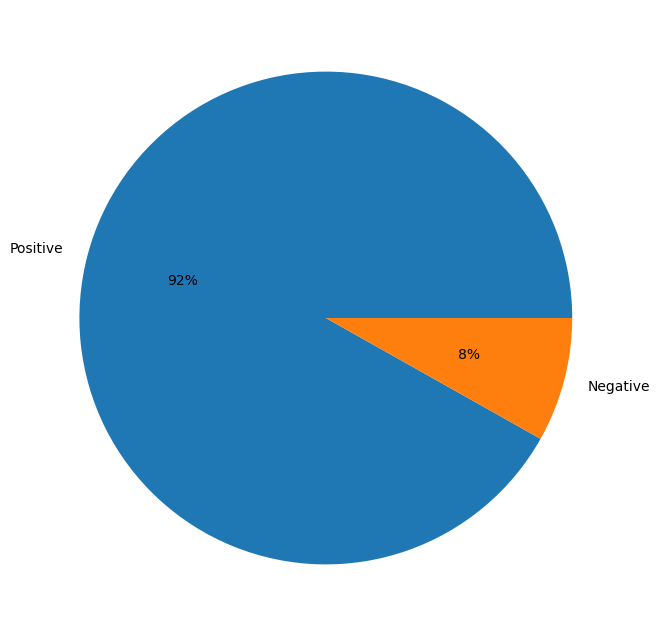

In [21]:
plt.figure(figsize=(8,8))
plt.pie(data['target'].value_counts() , labels=['Positive','Negative'] , autopct='%1.0f%%')
plt.show()


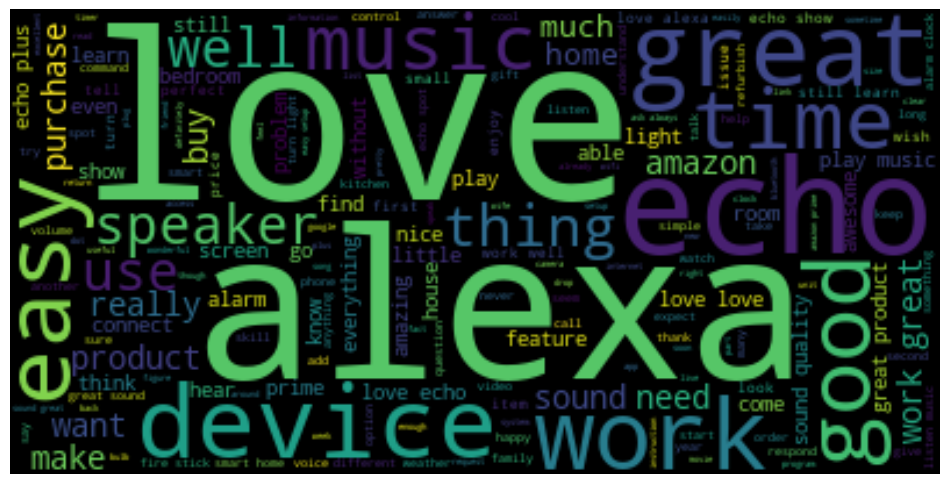

In [22]:

all_wordcloud = WordCloud(random_state=42 , max_font_size=100).generate(all_reviews)
plt.figure(figsize=(12,8))
plt.imshow(all_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


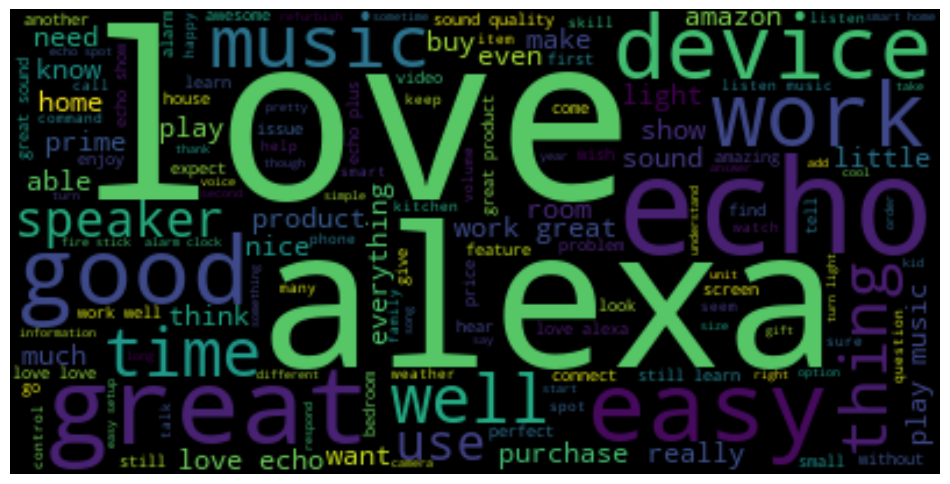

In [23]:

pos_wordcloud = WordCloud(random_state=42 , max_font_size=100).generate(pos_reviews)
plt.figure(figsize=(12,8))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


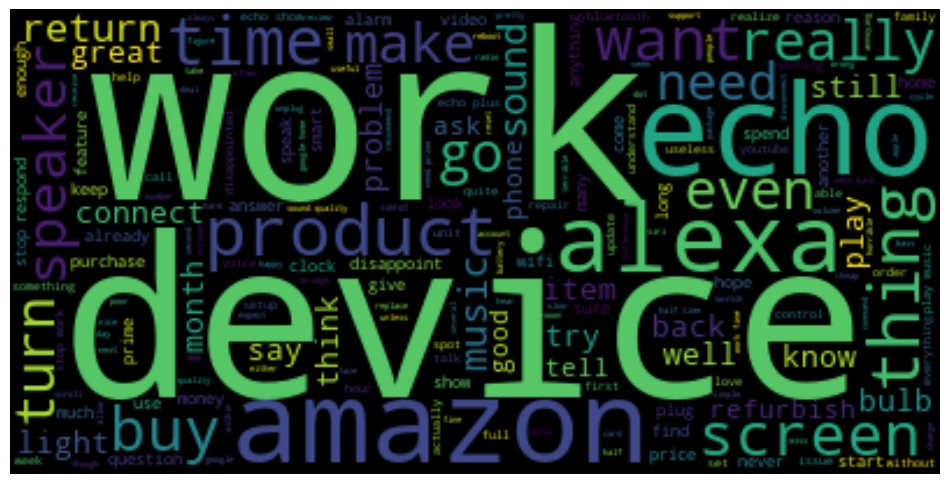

In [24]:

neg_wordcloud = WordCloud(random_state=42 , max_font_size=100).generate(neg_reviews)
plt.figure(figsize=(12,8))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


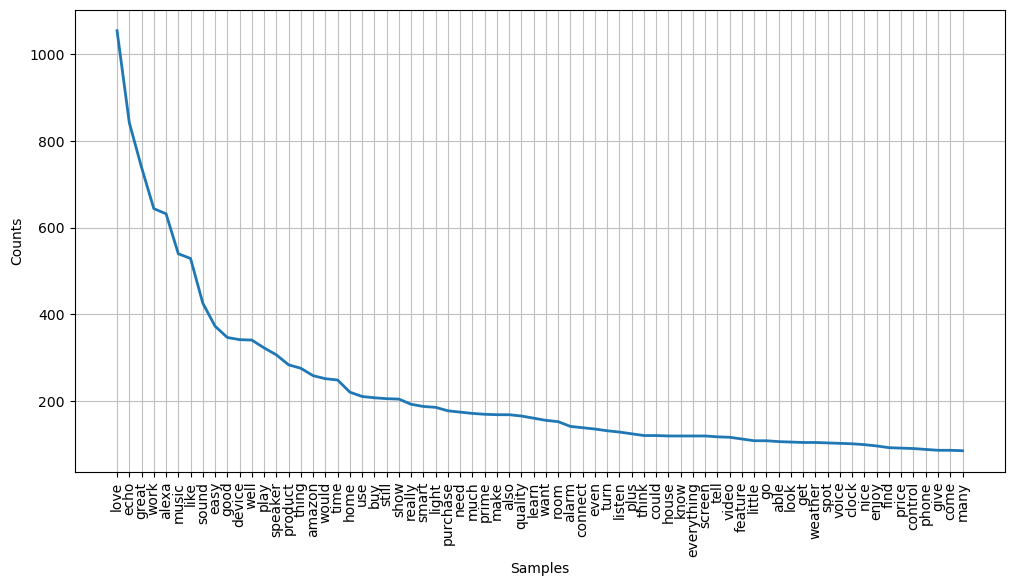

In [25]:

# fre dist


fredi=nltk.word_tokenize(all_reviews)
freqDist = FreqDist(fredi)
plt.figure(figsize=(12,6))
plt.xticks([])
freqDist.plot(70)
plt.show()
 

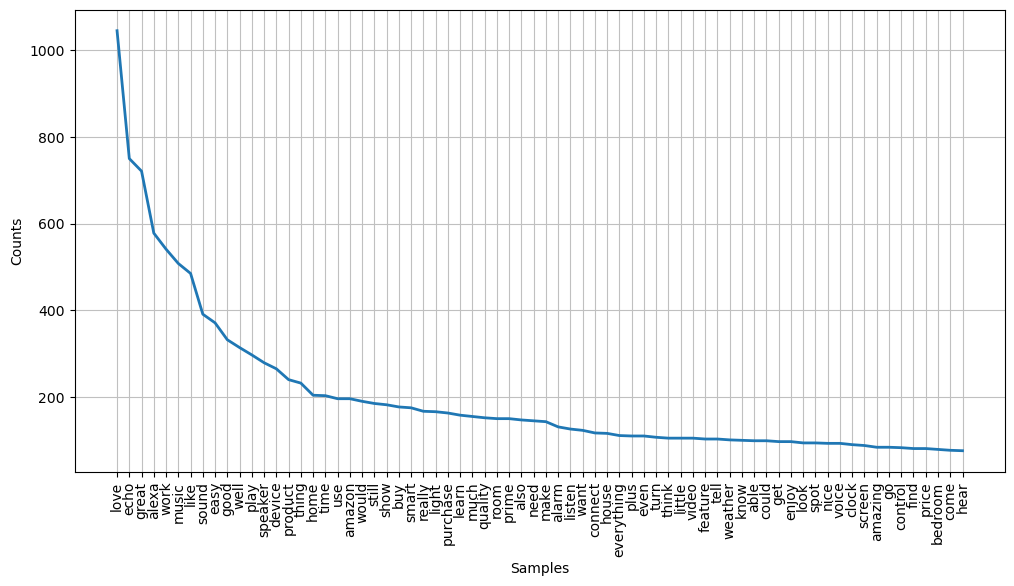

In [26]:
fredi=nltk.word_tokenize(pos_reviews)
freqDist = FreqDist(fredi)
plt.figure(figsize=(12,6))
plt.xticks([])
freqDist.plot(70)
plt.show()

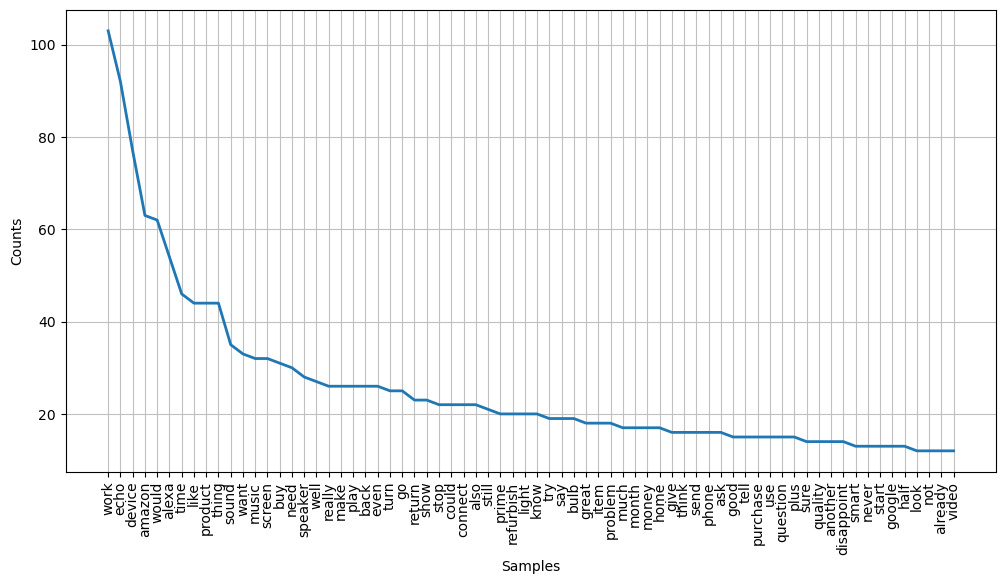

In [27]:
fredi=nltk.word_tokenize(neg_reviews)
freqDist = FreqDist(fredi)
plt.figure(figsize=(12,6))
plt.xticks([])
freqDist.plot(70)
plt.show()

In [28]:

# vectorization


In [29]:

vectorizer = CountVectorizer().fit(x)
feature_names = vectorizer.get_feature_names_out()
X = vectorizer.transform(x).toarray()

X_c = pd.DataFrame(X , columns= feature_names)


In [30]:

vectorizer = TfidfVectorizer().fit(x)
feature_names = vectorizer.get_feature_names_out()
X = vectorizer.transform(x).toarray()

X_t = pd.DataFrame(X , columns= feature_names)


In [31]:

# spliting


X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.20, random_state = 0)


In [32]:
# model build

In [33]:
# Logit

logit = LogisticRegression()
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)


In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9174603174603174


In [35]:
# Naive Byas

In [36]:
# BernoulliNB

In [37]:
# Train the Bernoulli Naive Bayes classifier
berNB = BernoulliNB()
berNB.fit(X_train, y_train)

# Predict on the test set
y_pred = berNB.predict(X_test)


In [38]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9047619047619048


In [39]:
# GaussianNB

In [40]:
# Train the Gaussian Naive Bayes classifier
gauNB = GaussianNB()
gauNB.fit(X_train, y_train)

# Predict on the test set
y_pred = gauNB.predict(X_test)


In [41]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5523809523809524


In [42]:
# MultinomialNB

In [43]:
# Train the Multinomial Naive Bayes classifier
mulNB = MultinomialNB()
mulNB.fit(X_train, y_train)

# Predict on the test set
y_pred = mulNB.predict(X_test)


In [44]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9158730158730158


In [45]:
# svm


# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)


In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.926984126984127


In [47]:
# Decession Tree

# Train the DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

# Predict on the test set
y_pred = dectree.predict(X_test)


In [48]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9238095238095239


In [49]:
# Random Forest

# Train the RandomForestClassifier
randForest = RandomForestClassifier()
randForest.fit(X_train, y_train)

# Predict on the test set
y_pred = randForest.predict(X_test)


In [50]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9396825396825397


In [51]:
######################################

In [52]:
# K-fold cross validation

In [53]:
randForest = RandomForestClassifier()

# Perform cross-validation
scores = cross_val_score(randForest, X_train, y_train, cv=10)

print("Cross-validation scores:", scores)

Cross-validation scores: [0.93650794 0.93253968 0.92857143 0.9484127  0.94444444 0.94444444
 0.93650794 0.92460317 0.92857143 0.92857143]


In [54]:
# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9353174603174603


In [55]:
# Grid Search cross validation

In [56]:
randForest = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=randForest, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [57]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [58]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.9333333333333333
